# Simple Linear Regression: JPY on DXY

C:\Users\nicho\AppData\Local\Temp\ipykernel_33620\3929325569.py:28: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dxy.index = pd.to_datetime(dxy.index)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


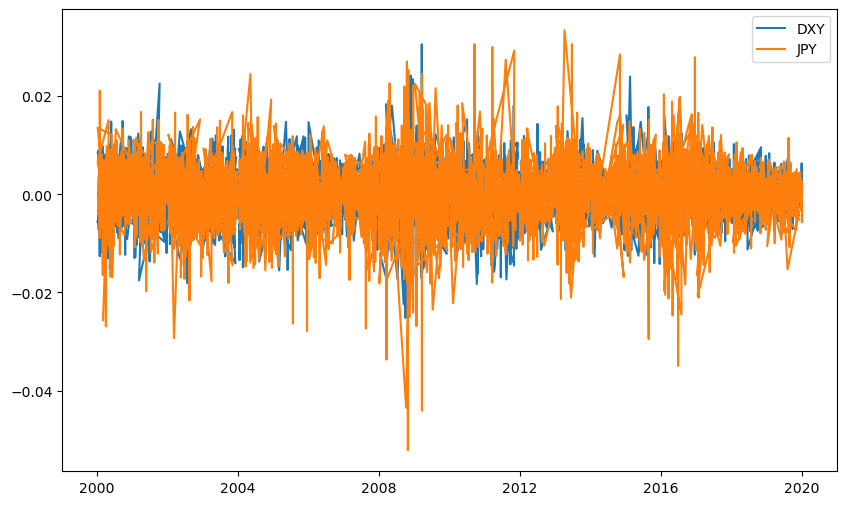

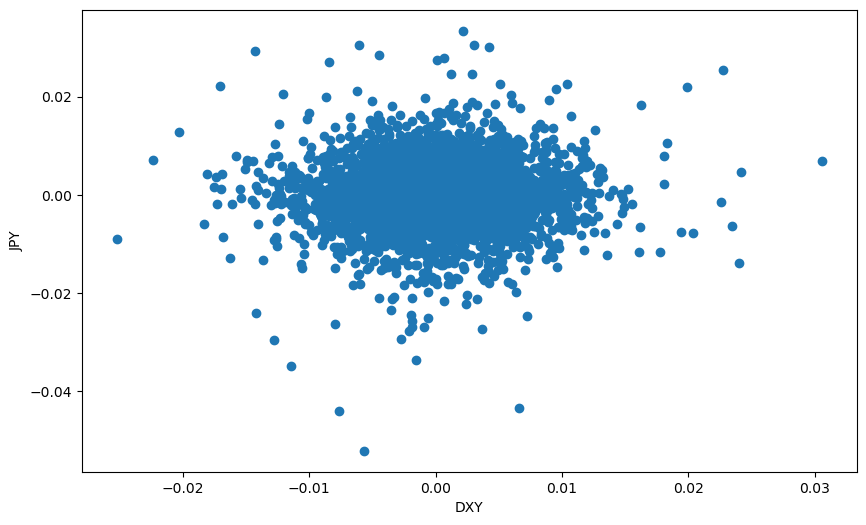

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Import data

data_path = "data/kaggle_fx_data_log_diff.csv"
data = pd.read_csv(data_path)
# Set 'datetime_index' as datetime index
data['datetime_index'] = pd.to_datetime(data['datetime_index'])
data.set_index('datetime_index', inplace=True)
jpy = data["JPY"]   

dxy_path = "data/DXY.csv"
dxy = pd.read_csv(dxy_path)
# drop row 0
dxy = dxy.iloc[1:]

dxy
# Convert 'Date' to datetime and set as index
dxy.set_index('Date', inplace=True)
dxy = dxy.astype(float)
# ensure index is datetime
dxy.index = pd.to_datetime(dxy.index)
# name index as 'datetime_index'
dxy.index.name = 'datetime_index'

# Rename col as 'DXY'
dxy.columns = ['DXY']
dxy

# Get log returns
dxy['DXY'] = np.log(dxy['DXY']) - np.log(dxy['DXY'].shift(1))
dxy = dxy.dropna()

print(type(dxy), type(jpy))

# Set both dxy and jpy to series
dxy = pd.Series(dxy['DXY'])
jpy = pd.Series(jpy)

# Get common dates 
common_dates = dxy.index.intersection(jpy.index)
dxy = dxy[common_dates]
jpy = jpy[common_dates]

# Plot both series
plt.figure(figsize=(10, 6))
plt.plot(dxy, label='DXY')
plt.plot(jpy, label='JPY')
plt.legend()
plt.show()


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dxy, jpy)
plt.xlabel('DXY')
plt.ylabel('JPY')
plt.show()




In [ ]:
# Get japanese yen returns from 